#### Notebook to calculate the mutation number of a transient material. The mutation number is defined as 
$$
M_u = \frac{T}{\lambda_{\mu}}
$$

where $( \lambda_{\mu}(t))$ is:

$$
\lambda_{\mu}(t) = \left( \frac{d \ln g}{dt} \right)^{-1} \approx \frac{t_2 - t_1}{\ln \left( \frac{g_{t_2}}{g_{t_1}} \right)}
$$


In [1]:
import os
from hermes_rheo.file_readers.trios_rheo_txt import TriosRheoReader
from hermes_rheo.transforms.rheo_analysis import RheoAnalysis 
from hermes_rheo.transforms.mutation_number import MutationNumber
from piblin.data import ExperimentSet

In [2]:
# Get the current directory where the notebook is located
current_dir = os.path.dirname(os.path.abspath("__file__"))  # Use "__file__" to get the notebook's directory

# Construct the relative path
filepath = os.path.join(current_dir, 'tutorial_data', 'tutorial_5', 'owchirp_tcs.txt')
print(filepath)

D:\codes\hermes-rheo\tutorial_notebooks\tutorial_data\tutorial_5\owchirp_tcs.txt


In [3]:
experiment = ExperimentSet(TriosRheoReader().data_from_filepath(filepath=filepath, create_composite_datasets=True).measurements)

In [4]:
pipeline = RheoAnalysis() + MutationNumber(dependent_variable='complex modulus')
processed_experiment = pipeline(experiment)

#### The plot on the left has all frequencies collected at each time, while the plot on the right averages the frequencies at each time step

(<Figure size 1600x600 with 2 Axes>,
 (<Axes: xlabel='Time (s)', ylabel='Mutation number'>,
  <Axes: xlabel='Time (s)', ylabel='Mutation number (average)'>))

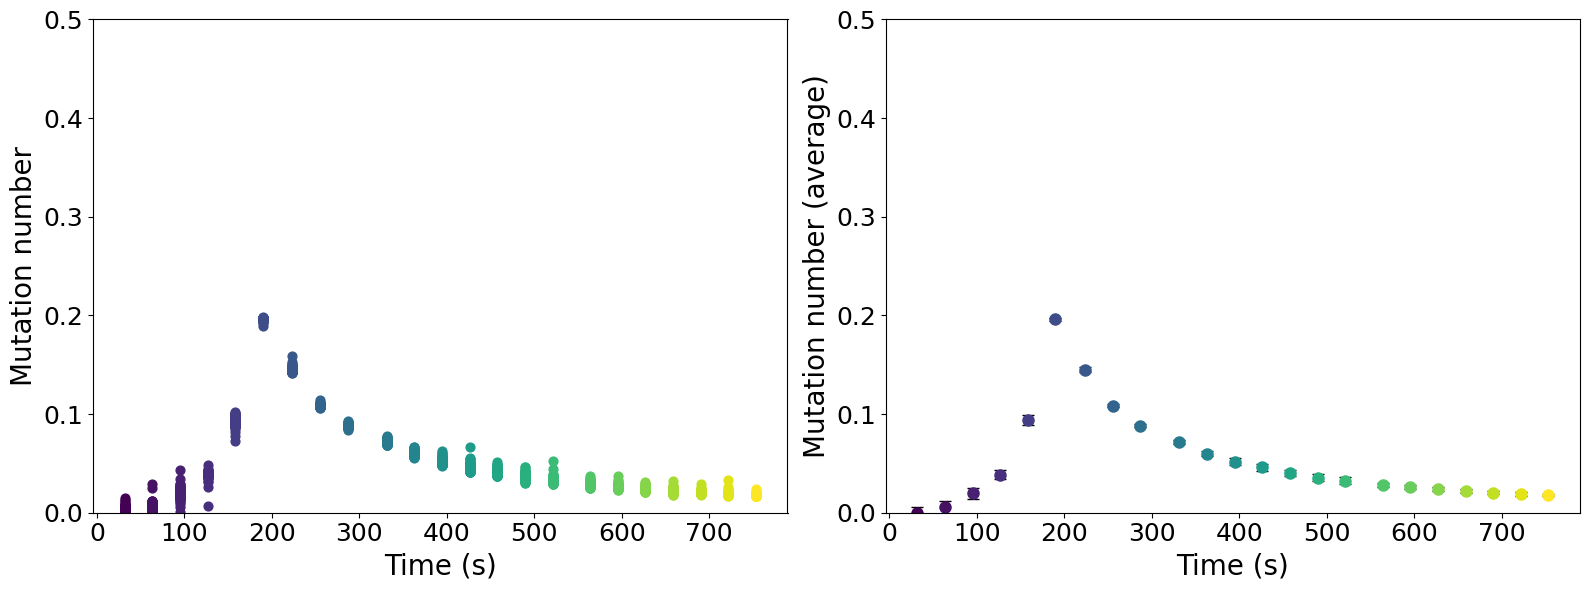

In [5]:
processed_experiment.visualize(show_all_frequencies=True, y_lim = (0,0.5))